In [4]:
import sklearn
print(sklearn.__version__)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

1.0.2


In [8]:
iris = load_iris()
iris_data = iris.data

iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label']= iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [11]:
# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,
                                                    test_size=0.2, random_state=11)

# 분류 의사결정 나무 객체 생성
df_clf = DecisionTreeClassifier(random_state=11)
# 학습 수행
df_clf.fit(X_train, y_train)
# 예측 수행
pred = df_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print('예측정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측정확도: 0.9333


### 예측 프로세스 정리
1. 데이터 세트 분리
2. 모델학습
3. 예측수행
4. 평가

In [13]:
# API 호출한 뒤에 key값 지정하기

iris_data = load_iris()
print(type(iris_data))
# 대부분 딕셔너리 형태이다

keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

<class 'sklearn.utils.Bunch'>
붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


* 데이터 키 = 피처들의 데이터 값

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.3, random_state=121)
dt_clf.fit(X_train, y_train)
pred = df_clf.predict(X_test)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 1.0000


# 교차 검증
## K fold

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

kfold = KFold(n_splits=5)   # 5개로 폴드로 분리
cv_accuracy = [] # 모델 평가 평균들을 저장하기 위해서
print('붓꽆 데이터 세트 크기:', features.shape[0]) # .shape[0]: 크기 나타내기

붓꽆 데이터 세트 크기: 150


In [4]:
n_iter = 0

for train_index, test_index in kfold.split(features): # split을 호출함으로서 분할할 수 있는 인덱스 반환
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], features[test_index]

    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test, pred), 4) # 정확도 측정
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print("\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3} "
          .format(n_iter, accuracy, train_size, test_size))
    print('\n#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

# 평균을 구해서 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

## stratified k 폴드

In [6]:
import pandas as pd
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

In [8]:
kfold = KFold(n_splits=3)

from sklearn.model_selection import StratifiedKFold

skf= StratifiedKFold(n_splits=3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[test_index]
    print('## 교차검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print("")

## 교차검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64

## 교차검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64

## 교차검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64



In [10]:
df_clf = DecisionTreeClassifier(random_state=16)

skfold = StratifiedKFold(n_splits=3)
n_iter = 0
cv_accuracy = []

for train_index, test_index in skfold.split(features, label):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]

    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)

    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n{0} 교차 검증 정확도: {1}, 학습 데이터의 크기: {2}, 검증 데이터의 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스: {1}'.format(n_iter, test_index))
    cv_accuracy.append(accuracy)

print('교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


1 교차 검증 정확도: 0.98, 학습 데이터의 크기: 100, 검증 데이터의 크기: 50
#1 검증 세트 인덱스: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

2 교차 검증 정확도: 0.94, 학습 데이터의 크기: 100, 검증 데이터의 크기: 50
#2 검증 세트 인덱스: [ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

3 교차 검증 정확도: 0.98, 학습 데이터의 크기: 100, 검증 데이터의 크기: 50
#3 검증 세트 인덱스: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=16)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv=3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.92 1.  ]
평균 검증 정확도: 0.9667


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

import pandas as pd

grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)
grid_dtree.fit(X_train, y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
# 원하는 칼럼만 추출해서 보여주기
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


In [7]:
print('최적파라미터:', grid_dtree.best_params_)
print('최고 정확도:{0:.4f}'.format(grid_dtree.best_score_))

최적파라미터: {'max_depth': 3, 'min_samples_split': 2}
최고 정확도:0.9750


In [8]:
estimator = grid_dtree.best_estimator_

pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

테스트 데이터 세트 정확도:0.9667


# 데이터 전처리
## 데이터 인코딩

In [13]:
# 레이블 인코딩
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 2]


In [15]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '전자레인지']


In [17]:
print('디코딩 원본값:', encoder.inverse_transform([2,1,0]))

디코딩 원본값: ['전자레인지' '냉장고' 'TV']


In [18]:
# 원핫 인코딩

from sklearn.preprocessing imoport OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지']
items = np.array(items).reshape(-1,1)

oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

print(oh_labels)
print('원핫인코딩 데이터')
print(oh_labels.toarray())
print('원핫인코딩 데이터 차원')
print(oh_labels.shape)
# 요거는 조금 어려운 방식

SyntaxError: invalid syntax (1337782300.py, line 3)

In [19]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_전자레인지
0,1,0,0
1,0,1,0
2,0,0,1


In [20]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본:', np.round(train_array.reshape(-1),2))
print('scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# fit을 다시 호출하면 안 됨
test_scaled = scaler.transform(test_array)
print('\n원본:', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

NameError: name 'train_array' is not defined

# 타이타닉 생존자 예측

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('C:/Users/sgsgk/Documents/machine-learning-example-data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
print('\n학습 데이터 정보\n')
print(titanic_df.info())


학습 데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [23]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
# print('\n요건 뭐지', titanic_df.isnull().sum()) # 요거는 각 열에 대해 표시
print('\n데이터 세트 Null 값 수', titanic_df.isnull().sum().sum()) # 요거는 진짜 전체의 개수에 대해 표시


요건 뭐지 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

데이터 세트 Null 값 수 0


In [24]:
print(titanic_df['Sex'].value_counts())
print("")
print(titanic_df['Cabin'].value_counts())
print("")
print(titanic_df['Embarked'].value_counts())

male      577
female    314
Name: Sex, dtype: int64

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

S       644
C       168
Q        77
Name      2
Name: Embarked, dtype: int64


In [26]:
# 요기서 Cabin 데이터가 조금 더 특이하기 때문에 다시 살펴보기
df = titanic_df
#df['Cabin']

# 선실 등급을 표시하기 위해서 앞부분만 추출
df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [29]:
df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

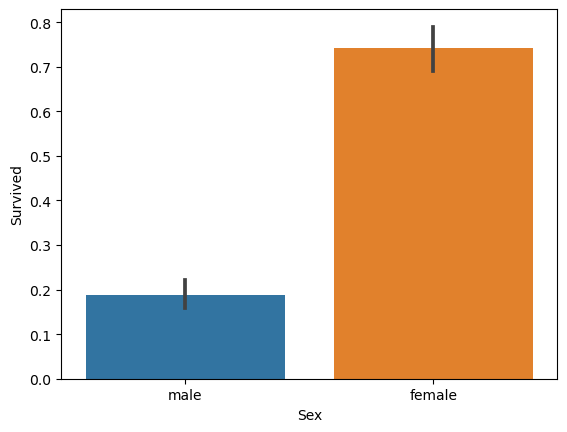

In [31]:
sns.barplot(x='Sex', y='Survived', data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

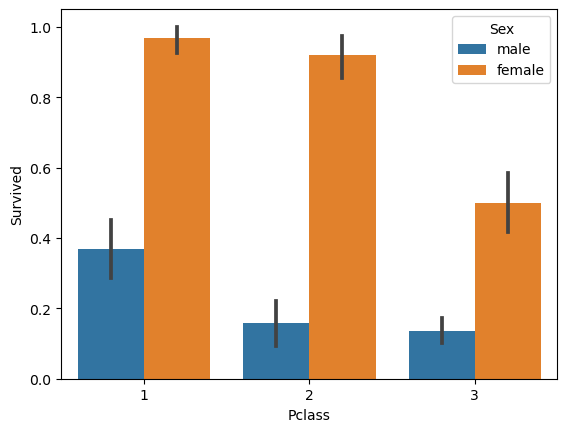

In [32]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

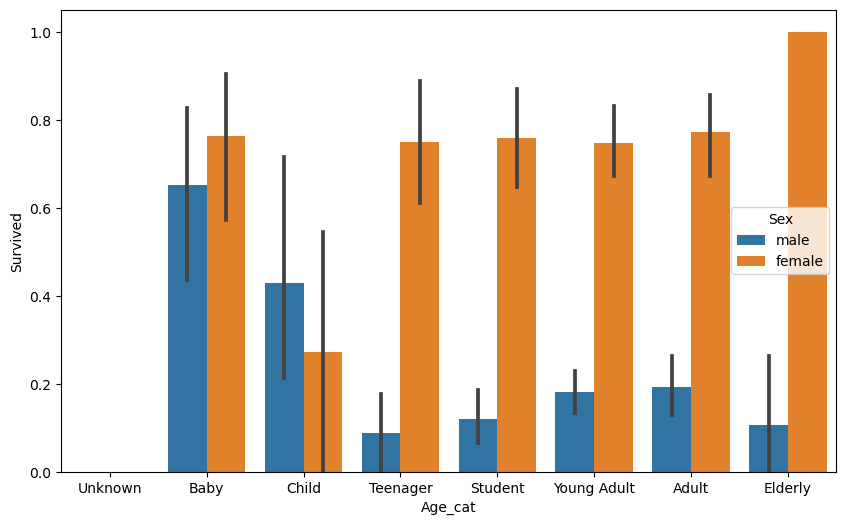

In [34]:
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5 : cat = 'Baby'
    elif age <= 12 : cat = 'Child'
    elif age <= 18 : cat = 'Teenager'
    elif age <= 25 : cat = 'Student'
    elif age <= 35 : cat = 'Young Adult'
    elif age <= 60 : cat = 'Adult'
    else : cat = 'Elderly'

    return cat

plt.figure(figsize=(10, 6)) # 사이즈 키워주기

# x 축값을 순차적으로 표시해주기 위해
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student',
               'Young Adult', 'Adult', 'Elderly']

df['Age_cat'] = df['Age'].apply(lambda x : get_category(x)) # 새로운 열 추가
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=df, order=group_names)
# order 을 설정해줌으써 순서 설정
df.drop('Age_cat', axis=1, inplace=True)

In [5]:
from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features = ['Cabin','Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder() # 먼저 모델 생성
        le = le.fit(dataDF[feature]) # 그 다음에 모델 fitting
        dataDF[feature] = le.transform(dataDF[feature]) # 해당 열이 transform된 DF로 바뀌는 것임
    return dataDF

df = encode_features(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,147,2


In [6]:
# 데이터 전처리 함수 만들기

def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True) # 불필요한 열 버리기
    return df

def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [8]:
df = pd.read_csv('C:/Users/sgsgk/Documents/machine-learning-example-data/titanic_train.csv')
y = df['Survived']
x = df.drop('Survived', axis=1)
x = transform_features(x)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=11)
rf = RandomForestClassifier(random_state=11)
lr = LogisticRegression(solver='liblinear')

dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8659


In [13]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]

    for iter_count, (train_index, test_index) in enumerate(kfold.split(x)):
        X_train, X_test = x.values[train_index], x.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]

        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도:{1:.4f}'.format(iter_count, accuracy))

    mean_score = np.mean(scores)
    print('평균 정확도: {0:.4f}'.format(mean_score))

exec_kfold(dt, folds=5)

교차 검증 0 정확도:0.7542
교차 검증 1 정확도:0.7809
교차 검증 2 정확도:0.7865
교차 검증 3 정확도:0.7697
교차 검증 4 정확도:0.8202
평균 정확도: 0.7823


In [14]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt, x, y, cv=5)

for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [16]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
              'min_samples_split':[2,3,5],
              'min_samples_leaf':[1,5,8]}

grid = GridSearchCV(dt, param_grid=parameters, scoring='accuracy', cv=5)
grid.fit(X_train, y_train)

print('최적의 파라미터:', grid.best_params_)
print('최고 정확도:{0:.4f}'.format(grid.best_score_))
best_clf = grid.best_estimator_

dpredictions = best_clf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 정확도:{0:.4f}'.format(accuracy))

최적의 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
최고 정확도:0.7992
테스트 세트에서의 정확도:0.8715


## 예제에 대한 순서 정리
### 전처리
1. Null 값 처리하기
2. (시각화해서 살펴보기)
3. 불필요한 피처 제거
4. 인코딩 수행

### 모델 생성하기
1. 전처리 수행
2. 훈련용, 테스트용 분리하기
3. 모델 생성하기 & 정확도
4. 교차검증
5. gridsearch -> 최적 파라미터 찾기
6. 최적의 파라미터 테스트용 데이터에 적용해보기
